In [1]:
# load packages and modules 

import pandas as pd 
import numpy as np
from IPython.display import Image

In [2]:
# read in the data sets 

stroke_raw = pd.read_csv("https://www.opendata.nhs.scot/dataset/f5dcf382-e6ca-49f6-b807-4f9cc29555bc/resource/47656572-e196-40c8-83e8-08b0b223b2e6/download/stroke_activitybyhbr.csv")

hb = pd.read_csv("https://www.opendata.nhs.scot/dataset/9f942fdb-e59e-44f5-b534-d6e17229cc7b/resource/652ff726-e676-4a20-abda-435b98dd7bdc/download/hb14_hb19.csv")

It is always a good idea to quickly double check your data has been read in as expected. 

In [3]:
stroke_raw.head()

,FinancialYear,HBR,HBRQF,AdmissionType,AdmissionTypeQF,AgeGroup,AgeGroupQF,Sex,SexQF,Diagnosis,NumberOfDischarges,NumberOfDischargesQF,CrudeRate,CrudeRateQF,EASR
0,2013/14,S08000015,NaN,All,d,0-44 years,NaN,Males,NaN,Cerebrovascular Disease,57.0,NaN,61.547764,NaN,66.515711
1,2013/14,S08000015,NaN,All,d,0-44 years,NaN,Females,NaN,Cerebrovascular Disease,42.0,NaN,44.180298,NaN,43.481241
2,2013/14,S08000015,NaN,All,d,45-64 years,NaN,Males,NaN,Cerebrovascular Disease,231.0,NaN,445.773832,NaN,444.876027
3,2013/14,S08000015,NaN,All,d,45-64 years,NaN,Females,NaN,Cerebrovascular Disease,209.0,NaN,371.238765,NaN,372.420079
4,2013/14,S08000015,NaN,All,d,65-74 years,NaN,Males,NaN,Cerebrovascular Disease,244.0,NaN,1198.899371,NaN,1229.931638


In [4]:
hb.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.0,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003


Below is an image showing where the different Health Boards are in Scotland on a map

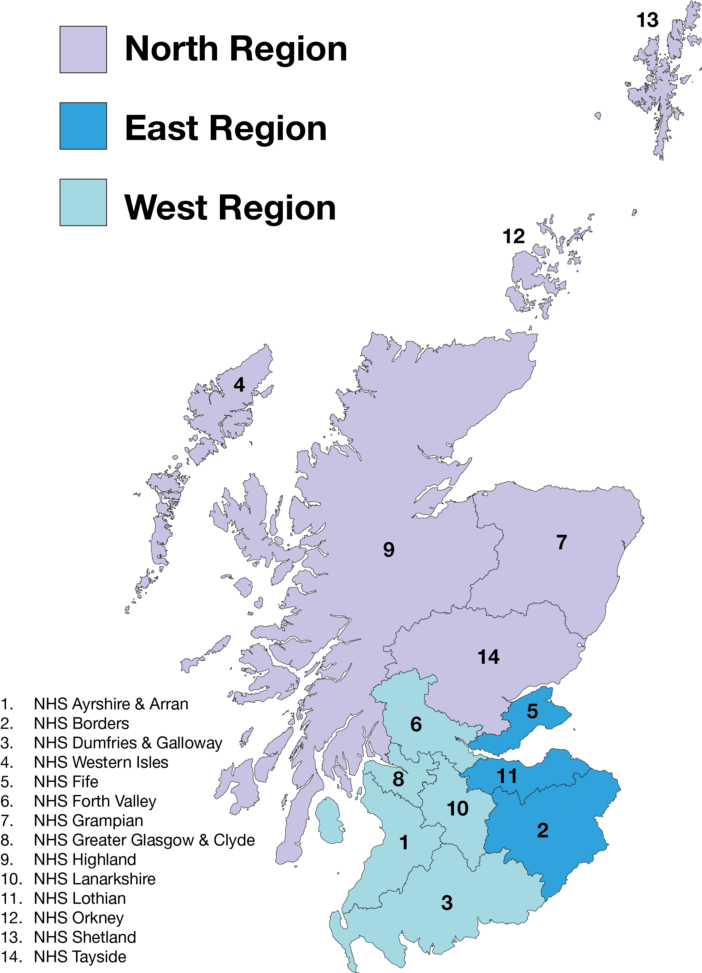

In [5]:
Image(filename = "C:\\Users\\USER\\Desktop\\Python\\Figures\\Map_of_Health_Boards.png")

East Region is comprised of NHS Fife, NHS Lothian and NHS Borders

## Question to solve 

The question we are trying to answer with the data is: 

> What is the average number of discharges with a stroke diagnosis by age group in the East region of Scotland for all admissions in the finanical year 2019/20 and 2020/21?

### Task 1

Looking at these two data frames, what columns do you think are the linkage keys? 

In [6]:
#HBR column in the stroke dataset with be used to join the HB column in the hb dataset.

### Task 2

Join the Stroke activity dataset with the [Health Board Labels](https://www.opendata.nhs.scot/dataset/geography-codes-and-labels/resource/652ff726-e676-4a20-abda-435b98dd7bdc) dataset into a new data frame called `stroke_join`. 

In the last above we identified the linkage key variable(s), which is the first step when wanting to complete a join. Next, you need to decide on the type of join you want to use and then implement this in code.

In [7]:
## your answer - we shall be using a left join

stroke_join = pd.merge(stroke_raw, hb, how='left', left_on='HBR', right_on='HB')

stroke_join.head()

,FinancialYear,HBR,HBRQF,AdmissionType,AdmissionTypeQF,AgeGroup,AgeGroupQF,Sex,SexQF,Diagnosis,NumberOfDischarges,NumberOfDischargesQF,CrudeRate,CrudeRateQF,EASR,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,2013/14,S08000015,NaN,All,d,0-44 years,NaN,Males,NaN,Cerebrovascular Disease,57.0,NaN,61.547764,NaN,66.515711,S08000015,NHS Ayrshire and Arran,20140401.0,NaN,S92000003
1,2013/14,S08000015,NaN,All,d,0-44 years,NaN,Females,NaN,Cerebrovascular Disease,42.0,NaN,44.180298,NaN,43.481241,S08000015,NHS Ayrshire and Arran,20140401.0,NaN,S92000003
2,2013/14,S08000015,NaN,All,d,45-64 years,NaN,Males,NaN,Cerebrovascular Disease,231.0,NaN,445.773832,NaN,444.876027,S08000015,NHS Ayrshire and Arran,20140401.0,NaN,S92000003
3,2013/14,S08000015,NaN,All,d,45-64 years,NaN,Females,NaN,Cerebrovascular Disease,209.0,NaN,371.238765,NaN,372.420079,S08000015,NHS Ayrshire and Arran,20140401.0,NaN,S92000003
4,2013/14,S08000015,NaN,All,d,65-74 years,NaN,Males,NaN,Cerebrovascular Disease,244.0,NaN,1198.899371,NaN,1229.931638,S08000015,NHS Ayrshire and Arran,20140401.0,NaN,S92000003


### Task 3

To answer our question outlined above, we do not need all of the columns currently in the `stroke_join` dataset. Process the data to include only the variables needed to answer the question and save this processed dataset into an object called `stroke`.

Check the dtypes of the remaining columns and cast them if not appropriate. 

<details><summary style='color:darkblue'>HINT: Beware of surprise summary or aggregate data! CLICK HERE TO SEE MORE.</summary>

Beware of aggregate or summary level data, even in variables not needed to directly answer the question. Consulting the data dictionary (if provided) or doing data checks is crucial at this stage. 

In [8]:
#Relevant Columns

stroke = stroke_join[['FinancialYear','AdmissionType','AgeGroup','Sex','Diagnosis','NumberOfDischarges','HBName']]

stroke

,FinancialYear,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,HBName
0,2013/14,All,0-44 years,Males,Cerebrovascular Disease,57.0,NHS Ayrshire and Arran
1,2013/14,All,0-44 years,Females,Cerebrovascular Disease,42.0,NHS Ayrshire and Arran
2,2013/14,All,45-64 years,Males,Cerebrovascular Disease,231.0,NHS Ayrshire and Arran
3,2013/14,All,45-64 years,Females,Cerebrovascular Disease,209.0,NHS Ayrshire and Arran
4,2013/14,All,65-74 years,Males,Cerebrovascular Disease,244.0,NHS Ayrshire and Arran
...,...,...,...,...,...,...,...
43195,2022/23,Transfer,45-64 years,All,TIAs and related syndromes,262.0,NaN
43196,2022/23,Transfer,65-74 years,All,TIAs and related syndromes,300.0,NaN
43197,2022/23,Transfer,75plus years,All,TIAs and related syndromes,726.0,NaN
43198,2022/23,Transfer,under75 years,All,TIAs and related syndromes,572.0,NaN


In [11]:
stroke.dtypes

FinancialYear          object
AdmissionType          object
AgeGroup               object
Sex                    object
Diagnosis              object
NumberOfDischarges    float64
HBName                 object
dtype: object

### Task 4

What is the shape of the `stroke` data currently? Is it in a suitable shape?

In [10]:
stroke.shape

(43200, 7)

### Task 5 

Now that we have our joined data set, it is important to inspect the data for any missing or aggregate values. We know from last week that this data set has many aggregate level responses! Check for the unique values of all 7 variables in `stroke`. Are there any unexpected findings? 

In [12]:
##Checking for missing values

stroke.isna().sum()

FinancialYear            0
AdmissionType            0
AgeGroup                 0
Sex                      0
Diagnosis                0
NumberOfDischarges    3697
HBName                2880
dtype: int64

In [13]:
#Checking for unique values

print(stroke['FinancialYear'].unique())
print(stroke['AdmissionType'].unique())
print(stroke['AgeGroup'].unique())
print(stroke['Sex'].unique())
print(stroke['Diagnosis'].unique())
print(stroke['HBName'].unique())

['2013/14' '2014/15' '2015/16' '2016/17' '2017/18' '2018/19' '2019/20'
 '2020/21' '2021/22' '2022/23']
['All' 'Elective' 'Emergency' 'Transfer']
['0-44 years' '45-64 years' '65-74 years' '75plus years' 'All'
 'under75 years']
['Males' 'Females' 'All']
['Cerebrovascular Disease' 'Stroke' 'Subarachnoid Haemorrhage'
 'TIAs and related syndromes']
['NHS Ayrshire and Arran' 'NHS Borders' 'NHS Dumfries and Galloway'
 'NHS Forth Valley' 'NHS Grampian' 'NHS Highland' 'NHS Lothian'
 'NHS Orkney' 'NHS Shetland' 'NHS Western Isles' 'NHS Fife' 'NHS Tayside'
 'NHS Greater Glasgow and Clyde' 'NHS Lanarkshire' nan]


### Task 6

We now know there are both aggregate level responses in our data frame as well as missing data. Before we deal with any missing data unnecessarily, let's filter out the responses we are not interested in (i.e., remove the rows we do not need to answer the question) and then check again for any missing data. It is likely that in doing so, the missing data may not be a problem anymore. 

Save your filtered data into a dataframe called `stroke_q`

<details><summary style='color:darkblue'>HINT: Breaking down the question. CLICK HERE TO SEE</summary>

First write down what responses you want to keep for each variable in order to answer the question. Then write the code to do so. 

In [14]:
stroke_q = stroke[ (stroke['Diagnosis'] == 'Stroke') & (stroke['FinancialYear'].isin(['2019/20','2020/21'])) &
                   (stroke['HBName'].isin(['NHS Fife','NHS Lothian','NHS Borders'])) & 
                   (~stroke['AgeGroup'].isin(['All','under75 years'])) & (stroke['AdmissionType'] == 'All' ) &
                   (stroke['Sex'] == 'All') 
      ]

stroke_q

,FinancialYear,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,HBName
20166,2019/20,All,0-44 years,All,Stroke,7.0,NHS Borders
20167,2019/20,All,45-64 years,All,Stroke,102.0,NHS Borders
20168,2019/20,All,65-74 years,All,Stroke,122.0,NHS Borders
20169,2019/20,All,75plus years,All,Stroke,307.0,NHS Borders
20196,2019/20,All,0-44 years,All,Stroke,102.0,NHS Lothian
20197,2019/20,All,45-64 years,All,Stroke,667.0,NHS Lothian
20198,2019/20,All,65-74 years,All,Stroke,695.0,NHS Lothian
20199,2019/20,All,75plus years,All,Stroke,1721.0,NHS Lothian
20220,2019/20,All,0-44 years,All,Stroke,45.0,NHS Fife
20221,2019/20,All,45-64 years,All,Stroke,395.0,NHS Fife


In [15]:
#Resetting the index

stroke_q = stroke_q.reset_index(drop=True)

stroke_q

,FinancialYear,AdmissionType,AgeGroup,Sex,Diagnosis,NumberOfDischarges,HBName
0,2019/20,All,0-44 years,All,Stroke,7.0,NHS Borders
1,2019/20,All,45-64 years,All,Stroke,102.0,NHS Borders
2,2019/20,All,65-74 years,All,Stroke,122.0,NHS Borders
3,2019/20,All,75plus years,All,Stroke,307.0,NHS Borders
4,2019/20,All,0-44 years,All,Stroke,102.0,NHS Lothian
5,2019/20,All,45-64 years,All,Stroke,667.0,NHS Lothian
6,2019/20,All,65-74 years,All,Stroke,695.0,NHS Lothian
7,2019/20,All,75plus years,All,Stroke,1721.0,NHS Lothian
8,2019/20,All,0-44 years,All,Stroke,45.0,NHS Fife
9,2019/20,All,45-64 years,All,Stroke,395.0,NHS Fife


In [16]:
stroke_q.isna().sum() #No missing values

FinancialYear         0
AdmissionType         0
AgeGroup              0
Sex                   0
Diagnosis             0
NumberOfDischarges    0
HBName                0
dtype: int64

### Task 7 

Now that we have our data prepared and check, answer the question posed at the the start of this notebook:
    
    
> What is the average number of discharges with a stroke diagnosis by age group in the East region of Scotland for all admissions in the finanical year 2019/20 and 2020/21?

In [19]:
stroke_q.groupby(['AgeGroup','FinancialYear',"HBName"])['NumberOfDischarges'].mean()

AgeGroup      FinancialYear  HBName     
0-44 years    2019/20        NHS Borders       7.0
                             NHS Fife         45.0
                             NHS Lothian     102.0
              2020/21        NHS Borders       9.0
                             NHS Fife         61.0
                             NHS Lothian      65.0
45-64 years   2019/20        NHS Borders     102.0
                             NHS Fife        395.0
                             NHS Lothian     667.0
              2020/21        NHS Borders      93.0
                             NHS Fife        348.0
                             NHS Lothian     666.0
65-74 years   2019/20        NHS Borders     122.0
                             NHS Fife        400.0
                             NHS Lothian     695.0
              2020/21        NHS Borders      83.0
                             NHS Fife        418.0
                             NHS Lothian     679.0
75plus years  2019/20        NHS Borders 

### Task 8 

As I mentioned in this week's content, wide data is often more human readable than long data. Take your solution to Task 7 and make the presentation a nicer by reshaping the data a bit! 

<details><summary style='color:darkblue'>HINT 1: Remember there are multiple functions in Python to reshape data! CLICK HERE TO SEE</summary>

Remember that we learned about 4 functions this week to reshape data in Python. 
    
* `melt` to make data longer and its counterpart `stack` for MutiIndex data frames or Series
* `pivot` to make data wider and its counterpart `unstack` for MutiIndex data frames or Series

<details><summary style='color:darkblue'>HINT 2: What is the data structure of your solution to Task 7? CLICK HERE TO SEE. </summary>
    
If you save your solution to task 7 into an object and then run the code `type(object_name)` you will see that the output is not a dataframe but rather a `pandas.core.series.Series`

In [21]:
stroke_q.groupby(['AgeGroup','FinancialYear',"HBName"])['NumberOfDischarges'].mean().unstack(level = [-1, 1])

HBName,NHS Borders,NHS Fife,NHS Lothian,NHS Borders,NHS Fife,NHS Lothian
FinancialYear,2019/20,2019/20,2019/20,2020/21,2020/21,2020/21
AgeGroup,,,,,,
0-44 years,7.0,45.0,102.0,9.0,61.0,65.0
45-64 years,102.0,395.0,667.0,93.0,348.0,666.0
65-74 years,122.0,400.0,695.0,83.0,418.0,679.0
75plus years,307.0,996.0,1721.0,286.0,930.0,1796.0


---
## Well done! 🎉 

Well done! You have completed all of the tasks for the Python notebook for this tutorial. If you have not done so yet, now move to the R notebook.

Do not forget your 3 stars, a wish, and a step mini-diaries for this week once you have completed the tutorial notebooks and content for the week. 


---
* Courtesy of Dr. Brittany Blankinship (2024)*